# Problem statement

In [ ]:
Predictive maintainanace of Tool wear of milling machine.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Date Gathering 

In [ ]:
Our client shared data through their SQL server, our Data Engineers collected the data,and we feched the data and 
converted into structed format into csv.(***18 expriement files and 1 target data***) 

In [69]:
frames = list()
results = pd.read_csv("train.csv")
results


,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN
5,6,wax,6,4.0,worn,yes,no
6,7,wax,20,4.0,worn,no,NaN
7,8,wax,20,4.0,worn,yes,no
8,9,wax,15,4.0,worn,yes,no
9,10,wax,12,4.0,worn,yes,no


In [4]:
# results[results['No'] == 1]

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes


# Exploratory Data Analysis

## Data clustering

In [71]:
for i in range(1,14):
    exp = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv(f"experiment_{exp}.csv")   #exp1
    row = results[results['No'] == i]     # 
# #     print(row)
    frame['target'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
    frames.append(frame)
df = pd.concat(frames, ignore_index = True)
df

# # row.iloc

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,target
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33243,165.0,-17.9,37.50,165.0,-17.9,-0.000095,-5.43,0.1080,329.0,28.30,...,2.700000e-19,329.0,0.0,-1.300000e-06,12.0,1.0,7.0,50.0,End,1
33244,163.0,-18.1,-6.25,163.0,-17.9,0.000000,-4.77,0.1070,329.0,30.00,...,2.700000e-19,329.0,0.0,-2.010000e-06,12.0,1.0,7.0,50.0,End,1
33245,162.0,-18.1,-81.20,161.0,-17.9,0.000000,-5.61,0.1040,328.0,30.30,...,2.700000e-19,329.0,0.0,1.180000e-06,12.0,1.0,7.0,50.0,End,1
33246,160.0,-18.0,-6.25,160.0,-17.9,0.000000,-7.79,0.1340,328.0,30.30,...,2.700000e-19,329.0,0.0,-3.480000e-06,12.0,1.0,7.0,50.0,End,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33248 entries, 0 to 33247
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          33248 non-null  float64
 1   X1_ActualVelocity          33248 non-null  float64
 2   X1_ActualAcceleration      33248 non-null  float64
 3   X1_CommandPosition         33248 non-null  float64
 4   X1_CommandVelocity         33248 non-null  float64
 5   X1_CommandAcceleration     33248 non-null  float64
 6   X1_CurrentFeedback         33248 non-null  float64
 7   X1_DCBusVoltage            33248 non-null  float64
 8   X1_OutputCurrent           33248 non-null  float64
 9   X1_OutputVoltage           33248 non-null  float64
 10  X1_OutputPower             33248 non-null  float64
 11  Y1_ActualPosition          33248 non-null  float64
 12  Y1_ActualVelocity          33248 non-null  float64
 13  Y1_ActualAcceleration      33248 non-null  flo

## Data Analysis

In [78]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
categorical_val
for i in categorical_val:
    print(df[i])
    print("******************************************************")

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
33243    0.0
33244    0.0
33245    0.0
33246    0.0
33247    0.0
Name: Z1_CurrentFeedback, Length: 33248, dtype: float64
******************************************************
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
33243    0.0
33244    0.0
33245    0.0
33246    0.0
33247    0.0
Name: Z1_DCBusVoltage, Length: 33248, dtype: float64
******************************************************
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
33243    0.0
33244    0.0
33245    0.0
33246    0.0
33247    0.0
Name: Z1_OutputCurrent, Length: 33248, dtype: float64
******************************************************
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
33243    0.0
33244    0.0
33245    0.0
33246    0.0
33247    0.0
Name: Z1_OutputVoltage, Length: 33248, dtype: float64
**********************************************

In [79]:
for i in categorical_val:
    print(i,'>>>>>',df[i].unique())

Z1_CurrentFeedback >>>>> [0.]
Z1_DCBusVoltage >>>>> [0.]
Z1_OutputCurrent >>>>> [0.]
Z1_OutputVoltage >>>>> [0.]
S1_CommandAcceleration >>>>> [ 0.00e+00  1.00e+02 -9.54e-07  9.54e-07  5.00e+01]
S1_SystemInertia >>>>> [12.]
M1_CURRENT_PROGRAM_NUMBER >>>>> [1. 0. 4.]
M1_CURRENT_FEEDRATE >>>>> [50.  6. 20. 15. 12.  3.]
target >>>>> [0 1]


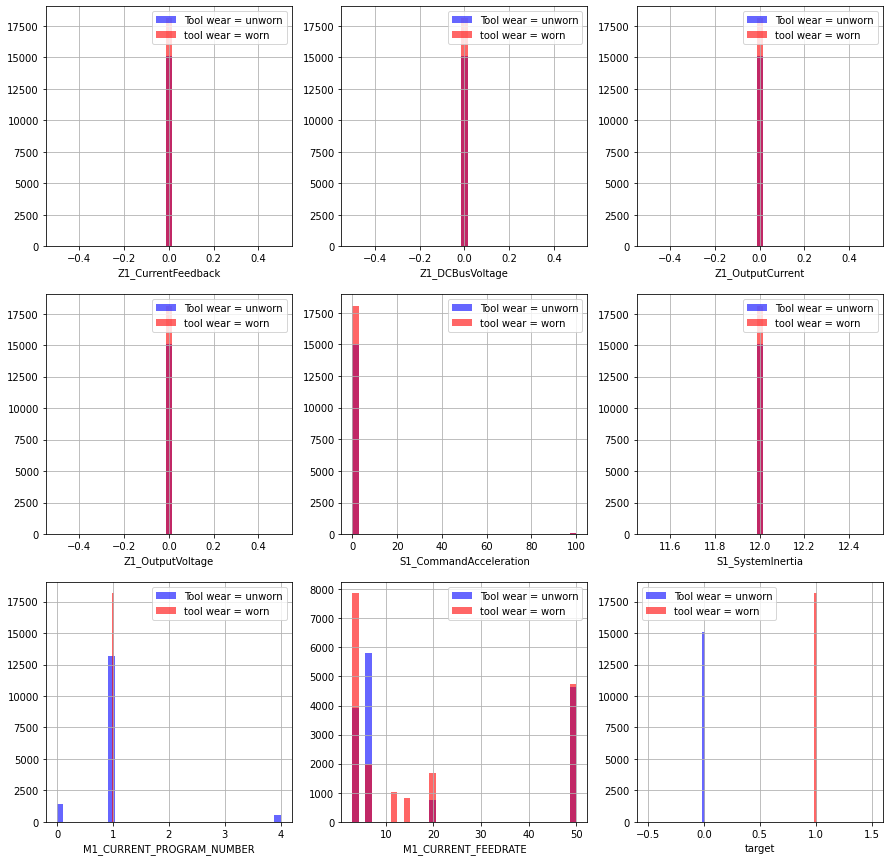

In [81]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val,1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Tool wear = unworn', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='tool wear = worn', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [ ]:
# 